[[ 2.5        -1.76776695  0.         ...  0.          0.
   0.        ]
 [-1.76776695  2.5        -1.76776695 ...  0.          0.
   0.        ]
 [ 0.         -1.76776695  5.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.5        -1.76776695
   0.        ]
 [ 0.          0.          0.         ... -1.76776695  5.
  -1.76776695]
 [ 0.          0.          0.         ...  0.         -1.76776695
   2.5       ]]


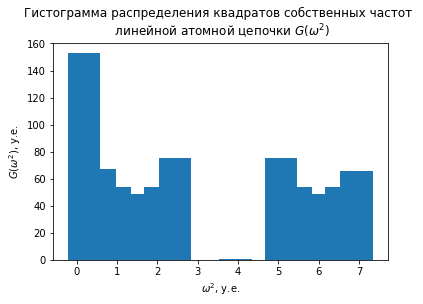

In [ ]:
"""
Задание #1. Построение гистограммы распределения квадратов собственных частот линейной атомной цепочки

Атомная линейная  цепочка содержит N=1000 атомов. Пронумеровать атомы от 0 до N-1 слева направо.
В приближении ближайших соседей сформировать динамическую матрицу и найти все её собственные значения,
используя функции eig или eigh. Построить график гистограммы распределения собственных значений динамической
матрицы с постоянным шагом h без использования функций для создания гистограмм из matplotlib.pyplot. 
Гистограмма должна содержать несколько десятков шагов. Численные значения параметров: gamma = 2.5, 
массы атомов с нечетными номерами равны 1.0, в с четными - равны 2.0 (здесь используются условные единицы).
"""
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

n = 1000

# массив, содержащий массы атомов в цепочке (массы атомов с нечетными номерами равны 1.0, в с четными - равны 2.0)
M = [1. if i%2==0 else 2. for i in range(n)]

gamma = 2.5

# функция для формирования динамической матрицы D
def calcD(n):
  D=np.zeros(n**2).reshape((n, n))
  for i in range(n):
    for j in range(n):
        if i==j:
          D[i][j] = 2*gamma
        if (i==j==0 or i==j==n):
          D[i][j] = gamma
        if (i+1==j or i-1==j):
          D[i][j] = -gamma
        D[i][j] /= math.sqrt(M[i]*M[j])
  return D

D = calcD(n)
print(D)

# нахождение собственных чисел и векторов матрицы
numbers, vectors = LA.eig(D)

# проверка собственных значений на неотрицательность
L = open("check_result.txt", "w")
isNegative = False
for el in numbers:
  if el < 0:
    isNegative = True
    print(e,file=L)
if isNegative:
  print("Есть отрицательные собственные значения",file=L)
else:
  print("Отрицательных собственных значений нет",file=L)
L.close()

# расчет шагов и колодцев для построения гистограммы
bins = 20
step = (np.max(numbers)-np.min(numbers))/bins
edges = [i*step+np.min(numbers) for i in range(bins)]

res = 0
resArray=[]
for i in range(len(edges)-1):
  for j in numbers:
    if edges[i] <= j and edges[i+1] > j:
      res += 1
  resArray.append(res)
  res=0

edgesCentres = [i*step+step/2+np.min(numbers) for i in range(bins-1)]

# построение гистограммы квадратов распределения собственных частот линейной атомной цепочки
fig, ax = plt.subplots()
ax.bar(edgesCentres,resArray,align='center')
edgesCentresR = [round(el,1) for el in edgesCentres]
#ax.set_xticklabels(edgesCentresR)
ax.set_ylabel('$G(\omega^2)$, у.е.')
ax.set_xlabel('$\omega^2$, у.е.')
ax.set_title('Гистограмма распределения квадратов собственных частот \n линейной атомной цепочки $G(\omega^2)$')
plt.savefig("pgf_gist.pdf")
plt.show()

In [ ]:
from google.colab import files

files.download("pgf_gist.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>